# Problem Set F1 Solutions

_PHY 323 Spring 2024, Prof. Ian Beatty_

In [2]:
# Setup…
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from IPython.display import display, Math

def print_math(s):
    display(Math(s))

## Problem 1: Explorers

Plan: Represent each team's journey as a succession (sum) of displacement vectors to get their final position. Then, take the differences of their positions to get a displacement vector from one team to the other, and take its magnitude to find the distance between them.

Team A: $ \vec{r}_A = \vec{d}_{A1} + \vec{d}_{A2} $

- $ \vec{d}_{A1} = \left< 0, 5, 0 \right> \text{ km} $

- $ \vec{d}_{A2} = \left< \cos(15^\circ), -\sin(15^\circ), 0 \right> \times 15 \text{ km} $

Team B: $ \vec{r}_B = \vec{d}_{B1} + \vec{d}_{B2} $

- $ \vec{d}_{B1} = \left< 6 \cos(45^\circ), -6 \sin(45^\circ), 2.5 \right> \text{ km} $

- $ \vec{d}_{B2} = \left< 0, 4, 0 \right> \text{ km} $



In [7]:
# Calculate…
d_A1 = np.array([ 0, 5, 0 ])
print_math(rf"\vec{{d}}_{{A1}} = \left<{d_A1[0]:.3f}, {d_A1[1]:.3f}, {d_A1[2]:.3f}\right> \text{{ km}}")
d_A2 = 7 * np.array([ -np.sin(np.radians(15)), np.cos(np.radians(15)), 0 ])
print_math(rf"\vec{{d}}_{{A2}} = \left<{d_A2[0]:.3f}, {d_A2[1]:.3f}, {d_A2[2]:.3f}\right> \text{{ km}}")
r_A = d_A1 + d_A2
print_math(rf"\vec{{r}}_{{A}} = \left<{r_A[0]:.3f}, {r_A[1]:.3f}, {r_A[2]:.3f}\right> \text{{ km}}")

d_B1 = np.array([ 6 * np.cos(np.radians(45)), 6 * np.sin(np.radians(45)), 2.5 ])
print_math(rf"\vec{{d}}_{{B1}} = \left<{d_B1[0]:.3f}, {d_B1[1]:.3f}, {d_B1[2]:.3f}\right> \text{{ km}}")
d_B2 = np.array([ 0, 4, 0 ])
print_math(rf"\vec{{d}}_{{B2}} = \left<{d_B2[0]:.3f}, {d_B2[1]:.3f}, {d_B2[2]:.3f}\right> \text{{ km}}")
r_B = d_B1 + d_B2
print_math(rf"\vec{{r}}_{{B}} = \left<{r_B[0]:.3f}, {r_B[1]:.3f}, {r_B[2]:.3f}\right> \text{{ km}}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The displacement vector from team A to team B is $ \vec{d}_{AB} = \vec{r}_B - \vec{r}_A $, and the distance is its magnitude $ \left| \vec{d}_{AB} \right| $.

In [8]:
# Calculate…
d_AB = r_B - r_A
print_math(rf"\vec{{d}}_{{AB}} = \left<{d_AB[0]:.3f}, {d_AB[1]:.3f}, {d_AB[2]:.3f}\right> \text{{ km}}")
d_AB_mag = norm(d_AB)
print_math(rf"\left|\vec{{d}}_{{AB}}\right| = {d_AB_mag:.3f} \text{{ km}}")


<IPython.core.display.Math object>

<IPython.core.display.Math object>

If the radios have a range of 7.25 km and the teams are 7/.436 km apart, then **no, they cannot communicate.**

> Update 2024-02-08: In the version of this solution originally posted, I screwed up the calculation of $\vec{d}_{A2}$ badly, and all the subsequent numbers and conclusion were flat-out wrong. (Hey, we all make stupid brain-flops sometimes.) Sorry for any confusion caused!

---

## Problem 2: Emergency Avoidance Maneuvers

Let's start by defining some symbols for our given values. I'll take my coordinate system to put the station at the origin, with my initial position out on the $-x$ axis and my velocity therefore in the $+x$ direction.

$$ \begin{split}
    &R = 175 \text{ m} \\
    &x_0 = -750 \text{ m} \\
    &v_0 = 25 \text{ m/s} \\
    &m = 35 \times 10^3 \text{ kg} \\
    &a_\text{max} = 0.40 \text{ m/s}^2
\end{split} $$

### a) Time to collision

I'm moving towards the station at 25 m/s, so without action I'll cross the 750 meters between me and it in

$$ t_\text{deer in headlights} = \left|\frac{x_0}{v_0}\right| = \frac{750\text{ m}}{25\text{ m/s}} = \boxed{30\text{ seconds}} $$

Better think fast!!

### b) Maximum braking

If I turn my thrusters towards the station to get a maximum acceleration away from it (i.e., maximum deceleration), I've got a 1D constant acceleration kinematics problem, with $a_x = -a_\text{max}$. (I'll omit the x-component subscripts for this section, since everything is in the x-direction.) Here's the model:

$$ \begin{split}
    x(t) &= x_0 + v_0 t + \frac{1}{2} (-a_\text{max})\,t^2 \\
    v(t) &= v_0 + (-a_\text{max})\,t
\end{split} $$

Do I stop in time? First I'll find the time at which the velocity goes to zero:

$$ \begin{split}
    &v(t_\text{stop}) = 0 \quad \Rightarrow \quad 0 = v_0 - a_\text{max}\,t_\text{stop} \\ \quad \\
    &\Rightarrow \quad t_\text{stop} = \frac{v_0}{a_\text{max}} = \frac{25\text{ m/s}}{0.40\text{ m/s}^2}
\end{split} $$

In [5]:
# Calculating…
v_0 = 25 # m/s
a_max = 0.40 #m/s^2
t_stop = v_0 / a_max
print_math(rf"\boxed{{t_\text{{stop}} = {t_stop:.3f} \text{{ s}}}}")

<IPython.core.display.Math object>

Now, let's figure out where I am at this time:

$$ x(t_\text{stop}) = x_0 + v_0 t_\text{stop} - \frac{1}{2} a_\text{max}\,t_\text{stop}^2 $$

In [6]:
# Calculating…
x_0 = -750 # m
x_stop = x_0 + v_0 * t_stop - 0.5 * a_max * t_stop**2
print_math(rf"\boxed{{x_\text{{stop}} = {x_stop:.3f} \text{{ m}}}}")

<IPython.core.display.Math object>

_Uh-oh…_ $x(t_\text{stop}) \gt 0$, which means I'm on the other side of the station, which means that I'd have slammed into it before coming to a stop.

How fast will I be going when I hit? The easiest way to find this is with that derived constant-acceleration formula that relates positions to velocities, having eliminated time.

$$ \begin{split}
    v^2 &= v_0^2 + 2\,(-a_\text{max}) (0 - x_0) \\
    &= (-25\text{ m/s})^2 + 2\, (-0.40\text{ m/s}^2) (0 + 750\text{ m}) \\
    &= 625\text{ m}^2/\text{s}^2 - 600\text{ m}^2/\text{s}^2 \\
    &= 25\text{ m}^2/\text{s}^2
\end{split} $$

So I hit at 5 m/s — not super-fast, but likely hard enough to be fatal in the vacuum of space. 😱 😵

_When_ will I hit? (The assignment doesn't ask you for this, but I'll calculate it anyway.) I can find this by solving the $x(t)$ equation for the time at which $x = 0$:

$$ \begin{split}
    0 &= x_0 + v_0 t_c - \frac{1}{2} a_\text{max}\,t_c^2 \\ \quad \\
    \Rightarrow \quad t_c &= \frac{v_0 \pm \sqrt{v_0^2 + 2\,a_\text{max}\,x_0}}{a_\text{max}} \\
    &= \frac{v_0}{a_\text{max}} \left( 1 \pm \sqrt{ 1 + \frac{2\,a_\text{max}\,x_0}{v_0^2}}\ \right)
    
\end{split} $$

In [7]:
# Calculating…
t_c1 = v_0 / a_max * (1 + np.sqrt(1 + 2 * a_max * x_0 / v_0**2))
t_c2 = v_0 / a_max * (1 - np.sqrt(1 + 2 * a_max * x_0 / v_0**2))
print_math(rf"t_c = {t_c1:.3f} \text{{ s or }} {t_c2:.3f} \text{{ s}}")

<IPython.core.display.Math object>

Why two solutions? Because the math doesn't know about crashing into the station, so it's happily telling us the time at which we zoom through the origin from $+x$ to $-x$, and also the later time at which we've continued on, slowed to a stop, accelerated back in the $-x$ direction, and are passing through $x = 0$ again. The earlier time is the one relvant to us: ***We crash after 50 seconds.***

### c) Perpendicular acceleration

If I turn my thrusters 90 degrees to my direction of motion, I've got a 2D constant-acceleration kinematics problem with $\vec{a} = a_\text{max}\, \hat{y}$.

In the x-direction, my velocity remains constant at $v_x = v_0 = 25\text{ m/s}$. Therefore, I reach $x = 0$ and either hit or pass the station at the same time calculated in part (a), $t_\text{deer in headlights} = 30\text{ s}$.

The key question here is: By that time, has the y-component of my position become large enough to exceed the station's radius (thus missing the station), or not (thus splatting)?

$$ \begin{split}
    y(t) &= y(0) + v_y(0)\,t + \frac{1}{2} a_\text{max}\,t^2 \\
    &= 0 + 0 + \frac{1}{2} (0.40\text{ m/s}^2) (30\text{ s})^2 \\
    &= 180\text{ m}
\end{split} $$

**That's 5 m beyond the station's rim, so I survive…**

…assuming that the "point particle approximation" is sufficient here! If I'm using the ship's center of mass as it's "location" and the ship is larger than 5 meters in radius, then I'll clip the station's edge, with predictably dire consequences.

### d) The hard part

> Note the typo in the problem: The wording for part (d) should read "200 m in **radius**" instead of "200 m in **diameter**". Sorry if that confused you.

Were the station's radius 200 m instead of 175 m, then clearly neither solution (b) nor (c) would suffice. What other options are there?

#### Idea 1: Full brake for part of the time, then full-sideways for the rest

Here's one idea: Aim the thrusters directly at the station and slow down as much as possible for some time $t_1$, then turn the thrusters $90^\circ$ and try to move far enough to the side to clear the station. My idea is that the time I invest in slowing down, before starting to accelerate sideways, will be more than repaid by the extra time I buy myself before colliding. Let's see how that works out!

For $0 < t < t_1$, the kinematic model is the same as in part (b), so at time $t_1$, my position and velocity are:

$$ \begin{split}
    x(t_1) &= x_0 + v_0 t_1 + \frac{1}{2}\,a\,t_1^2 \\
    y(t_1) &= 0 \\
    v_x(t_1) &= v_0 + a\,t_1 \\
    v_y(t_1) &= 0
\end{split} $$

For $t > t_1$, the kinematic model is like that of part (c), but starting later with different "initial" conditions:

$$ \begin{split}
    x(t) &= x(t_1) + v_x(t_1)\,(t - t_1) \\
         &= x_0 + v_0 t_1 + \frac{1}{2}\,a\,t_1^2 + \left( v_0 + a\,t_1 \right)\,(t - t_1) \\
         &= x_0 + \cancel{v_0} t_1 + \frac{1}{2}\,a\,t_1^2 + v_0 t + a\,t_1\,t - \cancel{v_0 t_1} - a\,t_1^2 \\
         &= x_0 - \frac{1}{2}\,a\,t_1^2 + \left( v_0 + a\,t_1 \right)\,t \\
    y(t) &= y(t_1) + v_y(t_1)\,(t - t_1) + \frac{1}{2}\,a\,(t - t_1)^2 \\
         &= \frac{1}{2}\,a\,(t - t_1)^2 \\
    v_x(t) &= v_x(t_1) = v_0 + a\,t_1 \\
    v_y(t) &= v_y(t_1) + a\,(t - t_1) = a\,(t - t_1)
\end{split} $$

I'll reach the plane of the station at whatever time $t_2$ makes $x(t_2) = 0$:

$$ \begin{split}
    &x(t_2) = 0 \\
    &\Rightarrow 0 = x_0 - \frac{1}{2}\,a\,t_1^2 + \left( v_0 + a\,t_1 \right)\,t_2 \\
    &\Rightarrow t_2 = \frac{\frac{1}{2}\,a\,t_1^2 - x_0}{v_0 + a\,t_1}
\end{split} $$

At that moment, my distance from the station's center is $y(t_2)$:

$$ \begin{split}
    y_2 \equiv y(t_2) &= \frac{1}{2}\,a\,(t_2 - t_1)^2 \\
        &= \frac{1}{2}\,a\,\left( \frac{\frac{1}{2}\,a\,t_1^2 - x_0}{v_0 + a\,t_1} - t_1 \right)^2 \\
\end{split} $$

Let's plot this as a function of $t_1$:

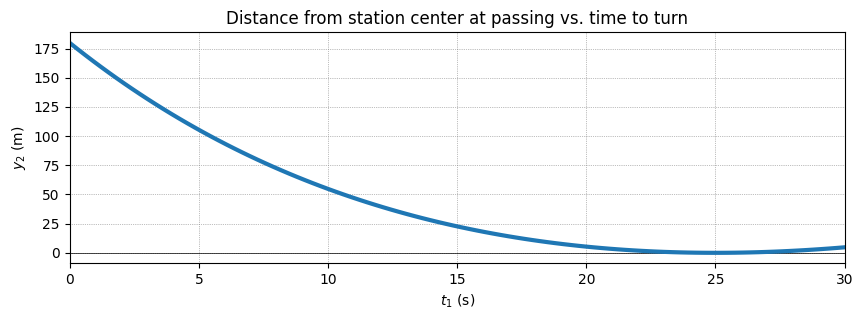

In [8]:
# Plotting…
def y2(t1):
    return 0.5 * a_max * ( (0.5 * a_max * t1**2 - x_0)/(v_0 + a_max * t1) - t1 )**2

t_values = np.linspace(0.0, 30, 100)
y2_values = np.array([y2(t) for t in t_values])
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot([0, 30], [0, 0], "k", linewidth=0.5)
ax.plot(t_values, y2_values, linewidth=3)
ax.set_xlim(0, 30)
# ax.set_xticks(np.arange(0, 21, 2))
ax.set_xlabel(r'$t_1$ (s)')
ax.set_ylabel(r'$y_2$ (m)')
ax.set_title('Distance from station center at passing vs. time to turn')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass

**Conclusion:** This idea will not work. The longer I "brake" before thrusting sideways, the less distance off-center I achieve.

> Confession: It bothers me that this graph seems to hit zero **before** $t_\text{deer in headlights} = 30\text{ s}$, and then curve back upwards. I may have an error in my derivation or calculation, but y'all have awaited these solutions long enough so I'll worry about it later.

#### Idea 2: Turn thrusters towards station, but not fully

Plan B is to aim my thrusters at some angle in between "towards the station" and "perpendicular to the station", in order to both slow my approach and push me to the side. It's conceivable that the x-component of acceleration might buy me enough extra time to allow the y-component to get me past the station's rim… or perhaps not. We need to math that.

Let's define $\theta$ to be the angle between "towards the station" and "the angle I point my thrusters", which makes it also the angle between $-\hat{x}$ and $\vec{a}$. My acceleration vector is therefore $\vec{a} = a_\text{max} \left[ -\cos(\theta)\,\hat{x} + \sin(\theta)\,\hat{y} \right]$, and the constant-acceleration kinematic equations for position are:

$$ \begin{split}
    x(t) &= x_0 + v_0\,t + \frac{1}{2} \left[-a_\text{max}\,\cos(\theta)\right]\,t^2 \\
    y(t) &= 0 + 0 + \frac{1}{2} \left[a_\text{max}\,\sin(\theta)\right]\,t^2
\end{split} $$

(Remember that $x_0 \lt 0$ and $v_0 \gt 0$.)

To find the y-coordinate at the moment I pass the station, I'll solve the x-position equation for the time at which $x = 0$, and then plug that into the y-position equation.

$$ \begin{split}
    &x(t_c) = 0 \\
    &\Rightarrow 0 = x_0 + v_0\,t_c - \frac{1}{2} a_\text{max}\,\cos(\theta)\,t_c^2 \\
    &\Rightarrow t_c = \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 \pm \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right)
\end{split} $$

via the quadratic formula. (This is precisely the same expression as in part (b), but with $a_\text{max}\cos(\theta)$ in place of $a_\text{max}$.) As in (b), the two solutions have physical meanings, with the smaller one indicating the first time the ship passes the plane of the station (either splatting or missing), and the second one indicating the hypothetical time at which the ship would pass again, heading back in the $-x$ direction. We're only interesed in the first, smaller one, so we'll ignore the positive part of the $\pm$:

$$ t_c = \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 - \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right) $$

**Sanity check 1:** For $\theta = 0^\circ$, this should agree with the time we found in (a): $t_c = 50$ seconds.

In [9]:
# Calculating…
def t(q):
    a = a_max * np.cos(q)
    return (1 - np.sqrt(1 + 2 * a * x_0 / v_0**2)) * v_0 / a

print_math(rf"\text{{For }}\theta = 0^\circ, t_c = {t(np.radians(0)):.3g} \text{{ s}}")

<IPython.core.display.Math object>

**Sanity check 2:** For $\theta = 90^\circ$, this should agree with the time we found in (a): $t_c = 30$ seconds. Unfortunately, I can't plug $\theta = 90^\circ$ directly into this equation because I get a zero over zero undefined result. I can take the limit as $\theta \rightarrow 90^\circ$, though.

For $\theta \approx 90^\circ$, $\cos(\theta) \ll 1$, which lets me simplify the square root via the binomial approximation $ \sqrt{1 + \epsilon} \approx 1 + \frac{1}{2}\epsilon\ $ for $\epsilon \ll 1$:

$$ \begin{split}
    t_c &= \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 - \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right)
    \\ \quad \\
    &\approx \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 - \left[ 1 + \frac{a_\text{max}\cos(\theta)\,x_0}{v_0^2}\right] \right)
    \\ \quad \\
    &= \frac{v_0}{a_\text{max}\cos(\theta)} \left( \frac{-a_\text{max}\cos(\theta)\,x_0}{v_0^2} \right)
    \\ \quad \\
    &= \frac{-x_0}{v_0} = \frac{-(-750\text{ m})}{25\text{ m/s}} = 30\text{ s}
\end{split} $$

exactly as found in part (a). 😁

My distance from the x-axis at that point is:

$$ \begin{split}
  y(t_c) &= \frac{1}{2} \left[a_\text{max}\,\sin(\theta)\right]\,t_c^2
  \\ \quad \\
  &= \frac{1}{2} \left[a_\text{max}\,\sin(\theta)\right] \left\{ \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 - \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right) \right\}^2
\end{split} $$

My distance from the x-axis at that point is:

$$ \begin{split}
  y(t_c) &= \frac{1}{2} \left[a_\text{max}\,\sin(\theta)\right]\,t_c^2
  \\ \quad \\
  &= \frac{1}{2} \left[a_\text{max}\,\sin(\theta)\right] \left\{ \frac{v_0}{a_\text{max}\cos(\theta)} \left( 1 - \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right) \right\}^2
  \\ \quad \\
  &= \frac{v_0^2\,\tan(\theta)}{2\,a_\text{max}\cos(\theta)} \left( 1 - \sqrt{ 1 + \frac{2\,a_\text{max}\cos(\theta)\,x_0}{v_0^2}}\ \right)^2
\end{split} $$

_Disgusting!_ In principle, I could find the value of $\theta$ that maximizes this expression, and then plug that in to find out whether I can get far enough from the station's center, but that's more algebra than I really want to do. Instead, I'll plot $y(t_c)$ vs. $\theta$:

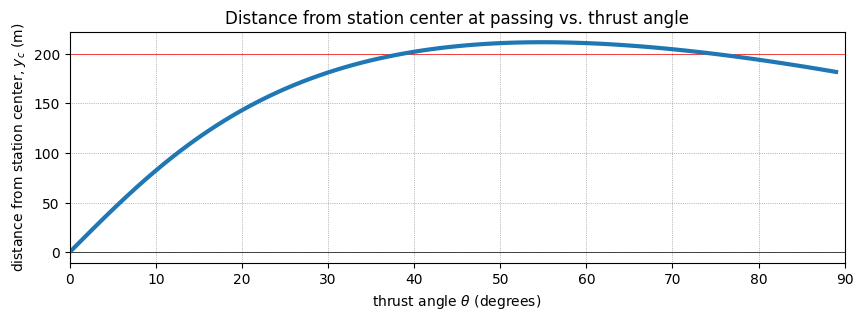

In [10]:
# Plotting…
def y_c(q):
    a = a_max * np.cos(q)
    t_c = t(q)
    return a_max * np.sin(q) * t_c**2 / 2

q_values = np.arange(0.0, 90, 1)
y_values = np.array([y_c(np.radians(q)) for q in q_values])
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot([0, 90], [0, 0], "k", linewidth=0.5)
ax.plot([0, 90], [200, 200], "r", linewidth=0.5)
ax.plot(q_values, y_values, linewidth=3)
ax.set_xlim(0, 90)
ax.set_xlabel(r'thrust angle $\theta$ (degrees)')
ax.set_ylabel(r'distance from station center, $y_c$ (m)')
ax.set_title('Distance from station center at passing vs. thrust angle')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass

**WOOOOOTT!!!** I can survive!! It looks like any thrust ange between about $38^\circ$ and $75^\circ$ will do the trick. I'll have the greatest margin of safety with $\boxed{\theta \approx 55^\circ}$.

---

## Problem 3: Avalanche Patrol

### a) Kinematic model

I'll choose a coordinate system with the origin at the canon's location, with +y directly upwards away from Earth and +x horizontal, with the slope rising into the first quadrant and making an angle of $\phi$ with the +x axis. In this coordinate system, the projectile's acceleration is a constant $\vec{a} = -g\,\hat{y}$, so I can use the convenient constant-acceleration kinematic equations rather than resorting to integrals. Its initial velocity is $\vec{v}_0 = v_0 \cos(\theta)\,\hat{x} + v_0 \sin(\theta)\,\hat{y}$, and its initial position is $\vec{r}_0 = 0$. 

$$ \begin{split}
    \vec{v}(t) &= \vec{v}_0 + \vec{a}\,t = v_0 \cos(\theta)\, \hat{x} + \left[ v_0 \cos(\theta) - g\,t \right] \hat{y} \\
    \vec{r}(t) &= \vec{r}_0 + \vec{v}_0\,t + \frac{1}{2}\,\vec{a}\,t^2 = v_0 \cos(\theta)\,t\, \hat{x} + \left[ v_0 \sin(\theta)\,t - \frac{1}{2}\,g\,t^2 \right] \hat{y}
\end{split} $$

### b) Distance up slope

The projectile hits the slope where the parabola of the charge's trajectory crosses the straight line of the slope.

The equation for the slope is easy: $\tan(\phi) = y_\text{slope} / x \Rightarrow y_\text{slope} = x \tan(\phi)$.

The projectile's trajectory is described by $y(x)$, not $y(t)$. To derive this, I can solve the x-component of the position equation for $t(x)$,

$$ x = v_0 \cos(\theta)\,t \quad \Rightarrow \quad t = \frac{x}{v_0 \cos(\theta)}, $$

and then substitute the resulting expression into the y-component of the position equation to eliminate $t$:

$$ \begin{split}
    y(x) &= v_0 \sin(\theta)\,t - \frac{1}{2}\,g\,t^2 = v_0 \sin(\theta) \left[\frac{x}{v_0 \cos(\theta)} \right] - \frac{1}{2}\,g\,\left[\frac{x}{v_0 \cos(\theta)}\right]^2 \\
      &= x \tan(\theta) - \frac{g\,x^2}{2\,v_0^2 \cos^2(\theta)}
\end{split} $$

(Aside: The first term can be interpreted as "the path the projectile would have followed in the absence of gravity", and the second as "the distance below that it's fallen because of gravity".)

To find the x-coordinate of the point where the projectile hits the slope, I'll solve for the value $x_h$ that makes $y = y_\text{slope}$:

$$ \begin{split}
    &y(x_h) = y_\text{slope}(x_h)
        \quad \Rightarrow \quad
        x_h \tan(\theta) - \frac{g\,x_h^2}{2\,v_0^2 \cos^2(\theta)} = x_h \tan(\phi)
    \\ \quad \\
    &\Rightarrow \tan(\theta) - \frac{g\,x_h}{2\,v_0^2 \cos^2(\theta)} = \tan(\phi)
        \quad \Rightarrow \quad
        \boxed{x_h = \frac{2\,v_0^2 \cos^2(\theta)}{g} \left[ \tan(\theta) - \tan(\phi) \right] }
\end{split} $$

**Limits check:**

1. If $\theta = \phi$, then $x_h = 0$, which is correct: The projectile is fired along the slope, striking it immediately (since we haven't built any "launch height above the ground" into the model). ✅

2. If $\phi = 0$, then $x_h = 2\,v_0^2 \cos(\theta) \sin(\theta) / g$, a well-known result for the range of a projectile on level ground. ✅

### c) Maximum distance up slope

This is straightforward, if algebraically tedious: Solve $dx_h/d\theta = 0$ to find the value of $\theta$ that maximizes $x_h$, and then plug this value back into the expression for $x_h$ to find the maximum possible distance up the slope.

To simplify the notation, I'll drop the subscript on $x_h$ for now, and define $A \equiv 2\,v_0^2 / g$. Then:

$$ \begin{align}
  x &= A\,\cos^2(\theta) \left[ \tan(\theta) - \tan(\phi) \right]
  \\
  \frac{dx}{d\theta} &= 2\,A\,\cos(\theta) \left[-\sin(\theta)\right] \left[ \tan(\theta) - \tan(\phi) \right] + A\,\cos^2(\theta) \sec^2(\theta)
\end{align} $$

This is straightforward, if algebraically tedious: Solve $dx_h/d\theta = 0$ to find the value of $\theta$ that maximizes $x_h$, and then plug this value back into the expression for $x_h$ to find the maximum possible distance up the slope.

To simplify the notation, I'll drop the subscript on $x_h$ for now, and define $A \equiv 2\,v_0^2 / g$. Then:

$$ \begin{align}
  x &= A\,\cos^2(\theta) \left[ \tan(\theta) - \tan(\phi) \right]
  \\
  \frac{dx}{d\theta} &= 2\,A\,\cos(\theta) \left[-\sin(\theta)\right] \left[ \tan(\theta) - \tan(\phi) \right] + A\,\cos^2(\theta) \sec^2(\theta)
  \\
    &= -2\,A\,\cos(\theta) \sin(\theta) \left[ \frac{\sin(\theta)}{\cos(\theta)} - \tan(\phi) \right] + A\,\cos^2(\theta) \frac{1}{\cos^2(\theta)}
  \\
    &= A\left[ 1 + 2\,\cos(\theta)\,\tan(\phi) - 2\,\sin^2(\theta) \right]
\end{align} $$

(It pays to know how the various trig functions are related!)

Setting the derivative to zero and solving yields the value of $\theta$ that produces the maximum distance:

$$ \begin{align}
  0 = 1 + 2\,\cos(\theta)\,\tan(\phi) - 2\,\sin^2(\theta)
\end{align} $$

## Problem 4: Course Adjustment

This is a straightforward kinematics problem, albeit with many details to keep track of: Integrating the acceleration function to get velocity, and integrating the velocity function to get position.

I'll work in units of kilometers and seconds.

### a) Acceleration graphs

Let's plot the acceleration's magnitude $a(t)$ and components $a_x(t), a_y(t)$ vs. time to check this visually. In component form, the acceleration vector is:

$$ \vec{a}(t) \equiv \left< a_x(t), a_y(t), a_z(t) \right> = \left< a(t)\,\cos(\theta), a(t)\,\sin(\theta), 0 \right> $$

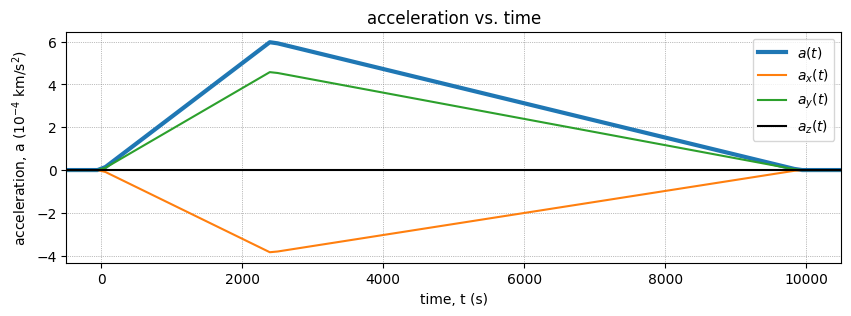

In [11]:
# Make the plot…
θ = np.radians(130) # degrees converted into radians
a_max = 6.0e-4 # km/s**2
t_1, t_2 = 2400, 9900 # s
def a_(t):
    if t < 0:
        return 0.0
    if t < t_1:
        return a_max * t / t_1
    if t < t_2:
        return a_max * ( 1.0 - (t - t_1) / (t_2 - t_1) )
    return 0.0
a = np.vectorize(a_) # for calculational convenience
t_min, t_max = -500, 10500
t_values = np.linspace(t_min, t_max, 100)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(t_values, a(t_values) * 1e4, linewidth=3, label="$a(t)$")
ax.plot(t_values, np.cos(θ) * a(t_values) * 1e4, label="$a_x(t)$")
ax.plot(t_values, np.sin(θ) * a(t_values) * 1e4, label="$a_y(t)$")
ax.plot(t_values, np.zeros_like(t_values), "k", label="$a_z(t)$")
ax.grid(color='gray', linestyle=':', linewidth=0.5)
ax.set_xlim(t_min, t_max)
ax.set_xlabel("time, t (s)")
ax.set_ylabel(r"acceleration, a ($10^{-4}\text{ km/s}^2)$")
ax.set_title("acceleration vs. time")
ax.legend()
pass

### b) Velocity function

Integrating an object's acceleration over time gives us the change in its velocity:

$$ \vec{v}(t) = \vec{v}(0) + \int_0^t \vec{a}(t')\,dt' $$

Integrating the piecewise-linear acceleration function is tedious but not hard, leading to:

$$
\vec{v}(t) = \vec{v}(0) + \left< \cos(\theta), \sin(\theta), 0 \right> \times \begin{cases}
   0 &\text{if}\quad t < 0 \\
   \frac{1}{2}\,a_\text{m}\, t^2 / t_1 &\text{if}\quad 0 \le t < t_1 \\
   \frac{1}{2}\,a_\text{m}\, t_1 + a_\text{m}\,\left(t - t_1\right)
       \left[ 1 - \frac{t - t_1}{2 (t_2 - t_1)} \right]
       &\text{if}\quad t_1 \le t < t_2 \\
   \frac{1}{2}\,a_\text{m}\, t_2 &\text{if}\quad t_2 \le t
\end{cases}
$$

where the initial velocity $\vec{v}(0)$ is $\left< 1.626, 0, 0 \right>\ \text{km/s}$.

### c) Velocity graphs

Inserting the given constants into the abofe function for $\vec{v}(t)$ and plotting numerically vs. time, we get:

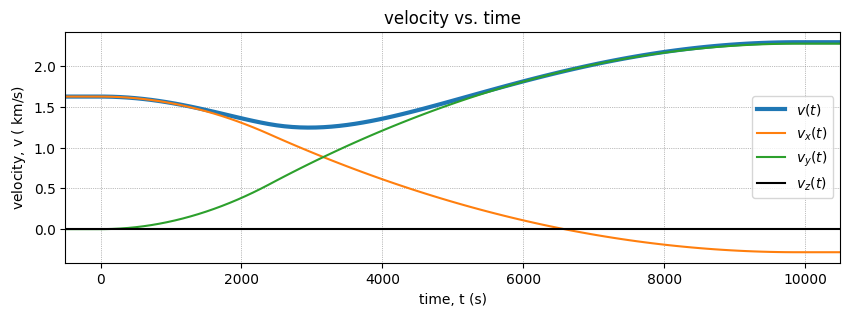

In [19]:
# Make the plot…
a_hat = np.array([np.cos(θ), np.sin(θ), 0])
v_0 = np.array([1.626, 0, 0]) # km/s
def v_vec(t):
    if t < 0:
        return v_0
    if t < t_1:
        return v_0 + a_hat * (a_max * t**2 / (2.0 * t_1))
    if t < t_2:
        return v_0 + a_hat * (a_max * t_1 / 2.0 + a_max * (t - t_1) * 
                        (1.0 - (t - t_1) / (2.0 * (t_2 - t_1) ) ) )
    return v_0 + a_hat * (a_max * t_2 / 2.0)

v_values = np.array([v_vec(t) for t in t_values])
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(t_values, np.linalg.norm(v_values, axis=1), linewidth=3, label="$v(t)$")
ax.plot(t_values, v_values[:,0], label="$v_x(t)$")
ax.plot(t_values, v_values[:,1], label="$v_y(t)$")
ax.plot(t_values, np.zeros_like(t_values), "k", label="$v_z(t)$")
ax.grid(color='gray', linestyle=':', linewidth=0.5)
ax.set_xlim(t_min, t_max)
ax.set_xlabel("time, t (s)")
ax.set_ylabel(r"velocity, v ($\text{ km/s})$")
ax.set_title("velocity vs. time")
ax.legend()
pass

### d) Change in speed

The probe's initial speed is given as 1.626 km/s.

The probe's final speed is reached when the acceleration falls to zero, at $t = 9900\text{ s} \equiv t_\text{f}$. According to our expression in (b), that speed is:

$$ \vec{v}(t_\text{f}) = \vec{v}(0) + \left< \cos(\theta), \sin(\theta), 0 \right>\ a_\text{m}\, t_2 / 2 $$

Inserting the situation's given constants, we get a numerical value of:

In [20]:
# Numerical calculations
v_f = v_0 + a_hat * a_max * t_2 / 2
from IPython.display import display, Math
display(Math(rf"\qquad \vec{{v}}(t_\text{{f}}) = \left< {v_f[0]:.3f}, {v_f[1]:.3f}, {v_f[2]:.3f} \right>\text{{ km/s}}"))

<IPython.core.display.Math object>

with a corresponding speed of

In [21]:
# Numerical calculations
v_f_mag = np.linalg.norm(v_f)
display(Math(rf"\qquad v(t_\text{{f}}) \equiv \left| \vec{{v}}(t_\text{{f}}) \right| = {v_f_mag:.3f} \text{{ km/s}}"))

<IPython.core.display.Math object>

The probe's change in speed is therefore

In [22]:
# Numerical calculations
Δv = v_f_mag - np.linalg.norm(v_0)
display(Math(rf"\qquad \Delta v = {Δv:.3f}\text{{ km/s}}"))

<IPython.core.display.Math object>

This is positive, so **the probe's speed increases.**

### 3) Change in direction

To find the angle between the probe's initial velocity vector and its final velocity vector, I'll use the dot product trick:

$$ \vec{a} \cdot \vec{b} = a\,b\,\cos(\theta) \quad \Rightarrow \quad \theta = \cos^{-1}\left( \frac{\vec{a} \cdot \vec{b}}{a\,b} \right) $$


In [31]:
# Calculuation…
q = np.degrees(np.arccos(np.dot(v_0, v_f) / (np.linalg.norm(v_0) * np.linalg.norm(v_f))))
display(Math(rf"\qquad \boxed{{\theta_{{i,f}} = {q:.3f}^\circ}}"))


<IPython.core.display.Math object>

---